# Example: Downloading datasets from the ECMWF archive with the `ecmwfapi`

> [!NOTE]
> The online laboratory has only been tested in recent Firefox and Chrome browsers. Some features may not (yet) be supported in Safari browsers.

> [!CAUTION]
> Any changes you make to this notebook will be lost once the page is closed or refreshed. Please download any files you would like to keep.

## The ECMWF Archive

The meteorological archive of the European Centre for Medium-Range Weather Forecasts (ECMWF) provides access to meteorological data in GRIB or NetCDF format. The archive can be accessed using the Meteorological Archival and Retrieval System (MARS) online at https://apps.ecmwf.int/mars-catalogue/ or programmatically using the `ecmwfapi` Python package. If you want to install the `ecmwfapi` package yourself, please note that its distribution name on PyPi is `ecmwf-api-client`.

## Installing and configuring the `ecmwfapi` package

To run this example, you need an ECMWF account and your API key, which is available from https://api.ecmwf.int/v1/key/. The key looks as follows:

```json
{
    "url"   : "<ECMWF-API-URL>",
    "key"   : "<ECMWF-API-KEY>",
    "email" : "<ECMWF-API-EMAIL>"
}
```

Please enter these values to configure the `ECMWFDataServer` in the next cell.

Please remember that you must keep your API key private and should not share a notebook that contains your persoal API key.

In [1]:
from ecmwfapi import ECMWFDataServer

server = ECMWFDataServer(**{
    "url"   : "<ECMWF-API-URL>",
    "key"   : "<ECMWF-API-KEY>",
    "email" : "<ECMWF-API-EMAIL>"
})

[pyodide]: Loading ecmwf-api-client
[pyodide]: Loaded ecmwf-api-client


## Retrieving the dataset

You can now retrieve the following example GRIB dataset.

> [!NOTE]  
> Retrieving a dataset from the ECMWF Archive may take a long time to process, ranging from minutes to hours, as data requests are served on the fly using a queueing system. If you intend to reuse a dataset several times, consider downloading it to your local machine instead of fetching it from the ECMWF archive every time.

Once the download has completed, you should have a new `03-t.grib` file in the `data/` subdirectory.

In [2]:
from pathlib import Path

data_path = Path("data") / "03-t.grib"

server.retrieve(
    {
        "dataset": "tigge",
        "date": "2024-08-02",
        "expver": "prod",
        "grid": "1/1",
        "levtype": "pl",
        "levelist": "1000",
        "model": "glob",
        "origin": "ecmwf",
        "param": "130",
        "step": "240",
        "time": "00:00:00",
        "type": "fc",
        "target": str(data_path),
    }
)

2024-10-07 10:01:17 ECMWF API python library 1.6.3
2024-10-07 10:01:17 ECMWF API at https://api.ecmwf.int/v1
2024-10-07 10:01:18 Welcome Juniper Tyree
2024-10-07 10:01:19 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2024-10-07 10:01:19 ------------ WARNING ------------
2024-10-07 10:01:19 Access to this dataset is transitioning to a new interface, dates to be announced soon
2024-10-07 10:01:19 For more information on how to access this data in the future, visit https://confluence.ecmwf.int/x/-wUiEw
2024-10-07 10:01:19 ---------------------------------
2024-10-07 10:01:20 Request submitted
2024-10-07 10:01:20 Request id: 6703873f39b136ceb51f5257
2024-10-07 10:01:20 Request is submitted
2024-10-07 10:01:22 Request is active
2024-10-07 10:01:27 Calling 'nice mars /tmp/20241007-0700/c6/tmp-_mars-J7csaQ.req'
2024-10-07 10:01:27 Forcing MIR_CACHE_PATH=/data/ec_coeff
2024-10-07 10:01:27 mars - WARN -
2024-10-07 10:0

In [3]:
import earthkit
import xarray as xr

ds = xr.open_dataset(data_path)
ds

[pyodide]: Loading xarray, pandas, tzdata, earthkit, earthkit-data, cdsapi, cads-api-client, attrs, multiurl, tqdm, typing-extensions, setuptools, distutils, cfgrib, click, eccodes, cffi, pycparser, findlibs, dask, cloudpickle, importlib_metadata, zipp, Jinja2, MarkupSafe, partd, locket, toolz, pyyaml, entrypoints, filelock, jsonschema, pyrsistent, markdown, netcdf4, cftime, h5py, pkgconfig, pdbufr, earthkit-meteo, earthkit-geo, pyproj, scipy, openblas, earthkit-maps, adjustText, Cartopy, shapely, pyshp, geos, cf-units, antlr4-python3-runtime, earthkit-regrid, earthkit-plots, earthkit-plots-default-styles, pint, earthkit-transforms, geopandas, fiona, cligj, rasterio, affine, gdal, click-plugins
[pyodide]: Loaded Cartopy, Jinja2, MarkupSafe, adjustText, affine, antlr4-python3-runtime, attrs, cads-api-client, cdsapi, cf-units, cffi, cfgrib, cftime, click, click-plugins, cligj, cloudpickle, dask, distutils, earthkit, earthkit-data, earthkit-geo, earthkit-maps, earthkit-meteo, earthkit-plo

/lib/python3.11/site-packages/earthkit/regrid/utils/caching.py:27: UserWarning: only soft file lock is available
  from filelock import FileLock


<xarray.Dataset>
Dimensions:        (latitude: 181, longitude: 360)
Coordinates:
    time           datetime64[ns] ...
    step           timedelta64[ns] ...
    isobaricInhPa  float64 ...
  * latitude       (latitude) float64 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * longitude      (longitude) float64 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
    valid_time     datetime64[ns] ...
Data variables:
    t              (latitude, longitude) float64 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-10-07T10:02 GRIB to CDM+CF via cfgrib-0.9.1...

## Plotting the dataset

We finally plot the loaded dataset. `earthkit` provides the

```python
earthkit.maps.quickplot(
    *data, blueprint=..., units=None, style=None, disjoint=False, show=True, **kwargs
) -> Optional[earthkit.maps.Chart]
```

helper function to plot weather and climate maps data.

In this example, we plot the temperature variable `t` from the dataset.

In [4]:
da = ds["t"]

/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


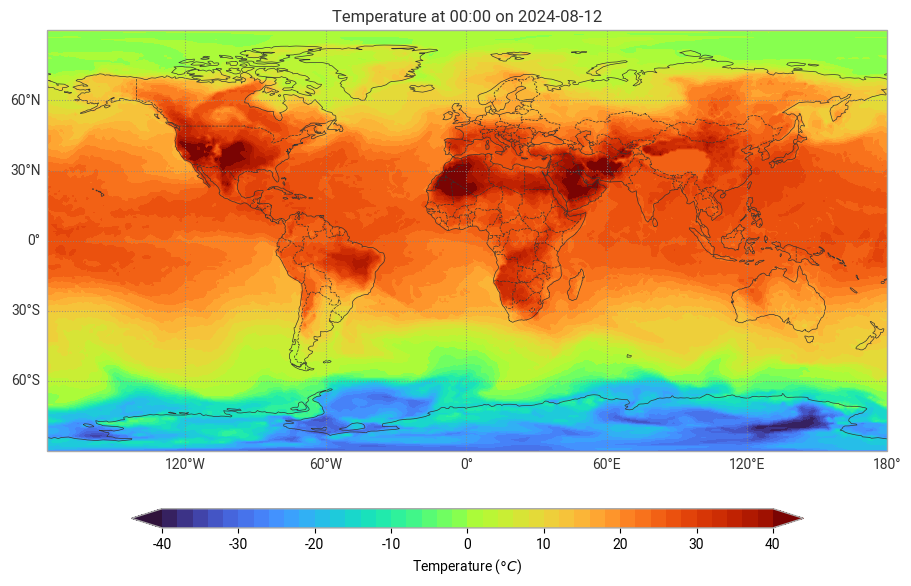

In [5]:
earthkit.maps.quickplot(da, units="degC");